In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import linalg
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import mean_squared_error
from sklearn import svm
from seaborn import heatmap as hmap
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from PRML_functions import prml   ## Module for manually written prml algorithms
from seaborn import heatmap as h_map
import os
# Group_No_5
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_3')

In [7]:
#Loading and splitting data into Train(80%),Validation(10%) and Test(10%).
my_data = np.genfromtxt('Dataset_3_Team_5.csv', delimiter=',')
X = my_data[:,:-1]
y = my_data[:,-1]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size = 0.8)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,train_size = 0.5)

# For decision boundary
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'Scatter plot of Dataset 3 Team 5')

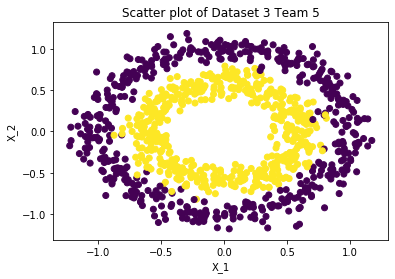

In [8]:
#Scatter plot
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter plot of Dataset 3 Team 5')

In [ ]:
###################### Logistic classification #########################################

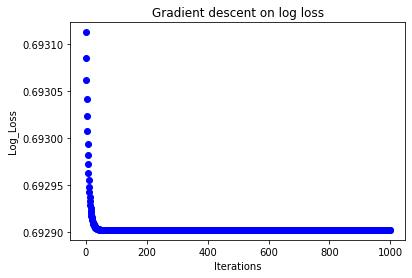

In [9]:
# To fine tune the gradient descent parameters: linear kernel, logistic classification
linear_logistic = prml(X_train,y_train)
dual_coeff,J = linear_logistic.kernel_logistic_grad_descent(itr = 1000,lr = 0.01,view = True)

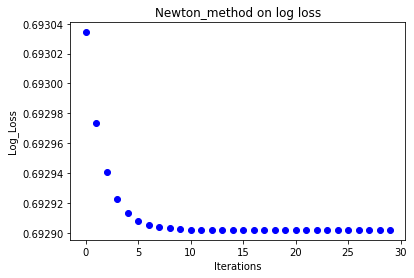

In [10]:
# To fine tune the newton's method parameters: linear kernel, logistic classification
linear_logistic = prml(X_train,y_train)
dual_coeff,J = linear_logistic.kernel_logistic_newton_method(itr = 30,view = True)

Text(0.5, 1.0, 'Learning curve for linear kernel logistic classification')

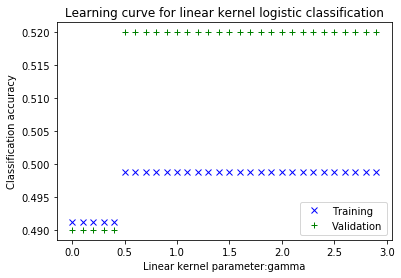

In [13]:
## Try out learning curve for choosing different parameters for linear kernel through gradient descent: logistic classification
linear_logistic = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,3,0.1)
for c in c_values:
    linear_logistic.kernel_logistic_grad_descent(coeff = c,itr=300)
    val_accuracy.append(acc_score(y_val,linear_logistic.predict(X_val)))
    train_accuracy.append(acc_score(y_train,linear_logistic.predict(X_train)))

plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel parameter:gamma')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel logistic classification')

Text(0.5, 1.0, 'Learning curve for linear kernel logistic classification')

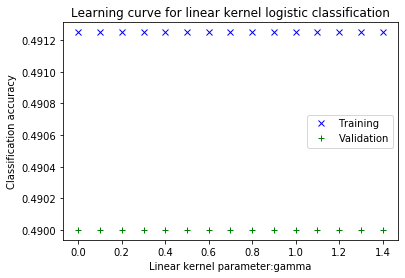

In [15]:
## Try out learning curve for choosing different parameters for linear kernel through newton's method : logistic classification
linear_logistic = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,1.5,0.1)
for c in c_values:
    linear_logistic.kernel_logistic_newton_method(coeff = c,itr=20)
    val_accuracy.append(acc_score(y_val,linear_logistic.predict(X_val)))
    train_accuracy.append(acc_score(y_train,linear_logistic.predict(X_train)))

plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel parameter:gamma')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel logistic classification')

Train Accuracy for linear kernel: 0.49125
Validation Accuracy for linear kernel: 0.49
Test Accuracy for linear kernel: 0.48


Text(0.5, 1.0, 'Decision boundary:linear kernel logistic classification using gradient descent')

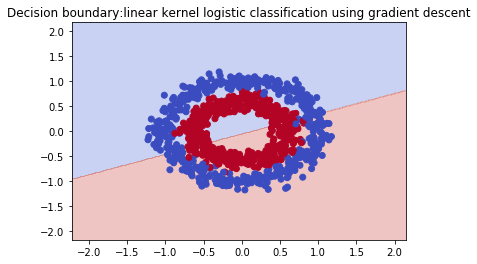

In [64]:
#### Get Train,Test and Validation error for linear kernel through gradient descent : logistic classsification
## Choosen parameters: coeff = 0.5 and gamma = 1.5, Though we will use coeff = 0 and gamma = 1.0 for uniformity in comparison with SVM
## as there is not significant difference in the accuracy.
linear_logistic.kernel_logistic_grad_descent(gamma = 1.0,coeff = 0.0,itr = 300)
train_acc = acc_score(y_train,linear_logistic.predict(X_train))
val_acc = acc_score(y_val,linear_logistic.predict(X_val))
test_acc = acc_score(y_test,linear_logistic.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function for linear kernel through gradient descent
z_linear = linear_logistic.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Decision boundary:linear kernel logistic classification using gradient descent')

Train Accuracy for linear kernel: 0.49125
Validation Accuracy for linear kernel: 0.49
Test Accuracy for linear kernel: 0.48


Text(0.5, 1.0, 'Decision boundary for linear kernel logistic classification using newton method')

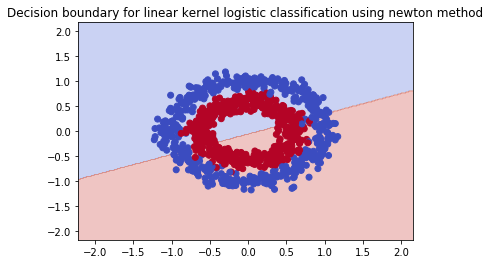

In [16]:
#### Get Train,Test and Validation error for linear kernel through newton's method : logistic classification
## Choosen parameters: Default parameters 
linear_logistic.kernel_logistic_newton_method(itr = 20)
train_acc = acc_score(y_train,linear_logistic.predict(X_train))
val_acc = acc_score(y_val,linear_logistic.predict(X_val))
test_acc = acc_score(y_test,linear_logistic.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function for linear kernel through newton's method
z_linear = linear_logistic.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Decision boundary for linear kernel logistic classification using newton method')

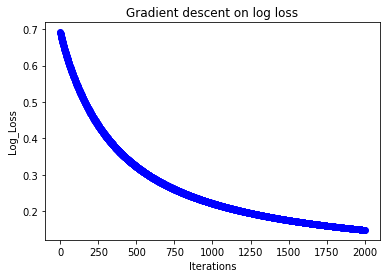

In [33]:
# To fine tune the gradient descent parameters: polynomial kernel, logistic classification
poly_logistic = prml(X_train,y_train)
dual_coeff,J = poly_logistic.kernel_logistic_grad_descent(degree =3,view =True,itr = 2000,lr = 0.01)

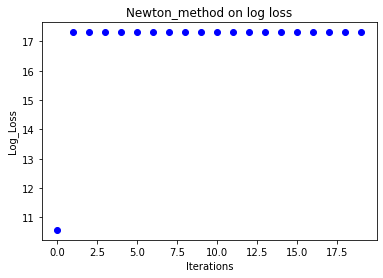

In [35]:
# To fine tune the newton's method parameters: polynomial kernel,logistic classification
poly_logistic = prml(X_train,y_train)
dual_coeff,J = poly_logistic.kernel_logistic_newton_method(degree =2,view =True,itr = 20)

Text(0.5, 1.0, 'Learning curve for polynomial kernel logistic classification')

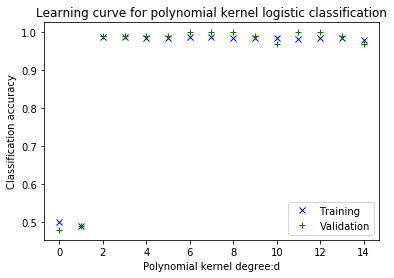

In [43]:
## Try out learning curve for choosing different parameters for polynomial kernel through gradient descent method:logistic classification
poly_logistic = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,15,1)
for c in c_values:
    poly_logistic.kernel_logistic_grad_descent(itr = 5000,degree = c,lr = 0.01)
    val_accuracy.append(acc_score(y_val,poly_logistic.predict(X_val)))
    train_accuracy.append(acc_score(y_train,poly_logistic.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Polynomial kernel degree:d')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel logistic classification')

Train Accuracy for linear kernel: 0.9875
Validation Accuracy for linear kernel: 0.99
Test Accuracy for linear kernel: 0.97


Text(0.5, 1.0, 'Decision boundary :polynomial kernel logistic classification with degree 2')

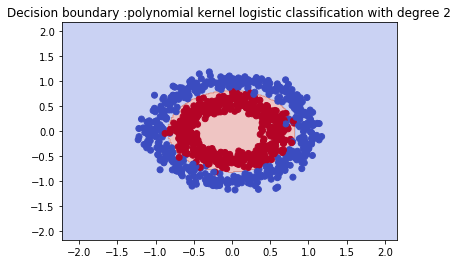

In [70]:
#### Get Train,Test and Validation error for linear kernel through newton's method: logistic classification
## Choosen parameters: degree = 2 
d = 2
poly_logistic.kernel_logistic_grad_descent(itr = 5000,degree = d)
train_acc = acc_score(y_train,poly_logistic.predict(X_train))
val_acc = acc_score(y_val,poly_logistic.predict(X_val))
test_acc = acc_score(y_test,poly_logistic.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function for polynomial kernel
z_poly = poly_logistic.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Decision boundary :polynomial kernel logistic classification with degree %s'%str(d))

In [49]:
###################### SVM #####################

Text(0.5, 1.0, 'Learning curve for linear kernel svm classifier')

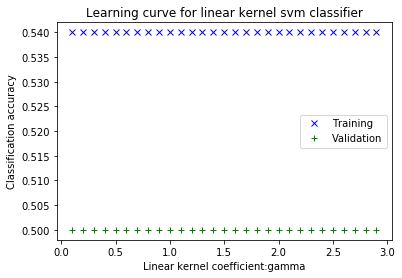

In [53]:
## Try out learning curve for choosing different parameters for linear kernel: svm
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0.1,3,0.1)
for c in c_values:
    clf_linear = svm.SVC(kernel='linear',gamma = c) # Change both the parameters
    clf_linear.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_linear.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_linear.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel coefficient:gamma')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel svm classifier')

Train Accuracy for linear kernel: 0.54
Validation Accuracy for linear kernel: 0.5
Test Accuracy for linear kernel: 0.47


Text(0.5, 1.0, 'Decision boundary for linear svm')

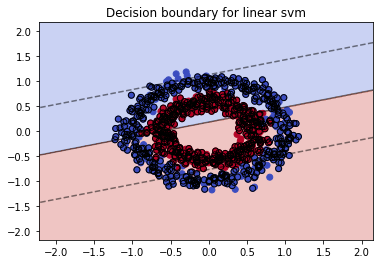

In [54]:
#### Get Train,Test and Validation error for linear kernel : svm
## Choosen parameters: Default parameters
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,y_train)
sv_linear = clf_linear.support_vectors_
train_acc = acc_score(y_train,clf_linear.predict(X_train))
val_acc = acc_score(y_val,clf_linear.predict(X_val))
test_acc = acc_score(y_test,clf_linear.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function and support vectors for linear kernel
z_linear = clf_linear.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_linear = clf_linear.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for linear svm')

Text(0.5, 1.0, 'Learning curve for polynomial kernel svm classifier')

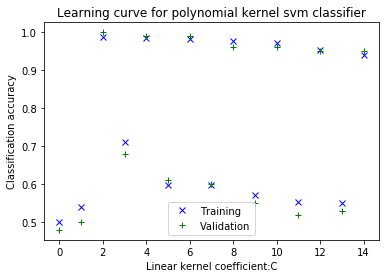

In [62]:
## Try out learning curve for choosing different parameters for polynomial kernel : svm
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,15,1)
for c in c_values:
    clf_poly = svm.SVC(kernel='poly',degree= c,gamma = 1.0)
    clf_poly.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_poly.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_poly.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel coefficient:C')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel svm classifier')

Train Accuracy for polynomial kernel: 0.9875
Validation Accuracy for polynomial kernel: 1.0
Test Accuracy for polynomial kernel: 0.97


Text(0.5, 1.0, 'Decision boundary for polynomial kernel svm for degree 2')

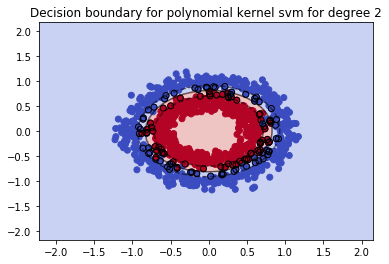

In [68]:
#### Get Train,Test and Validation error for polynomial kernel : svm
## Choosen parameters: degree = 2 
d = 2
clf_poly = svm.SVC(kernel='poly',degree=d,gamma=1)
clf_poly.fit(X_train,y_train)
sv_linear = clf_poly.support_vectors_
train_acc = acc_score(y_train,clf_poly.predict(X_train))
val_acc = acc_score(y_val,clf_poly.predict(X_val))
test_acc = acc_score(y_test,clf_poly.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)

#Scatter plot with decision function for polynomial kernel
z_poly = clf_poly.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf_poly.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for polynomial kernel svm for degree %s'%str(d))